In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score
import timeit

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

data = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#renaming unclear variables.
data = data.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [4]:
data.shape

(10000, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# checking for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
#checking for null values
data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [9]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'],
      dtype='object')

In [10]:
#dropping unneeded variables
data.drop(['CaseOrder','Customer_id', 'Interaction', 'UID', 'City', 'State', 'Children', 'Age',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'], axis=1, inplace=True)

In [11]:
#convert int to float
data['Timely_Respd'] = data['Timely_Respd'].astype('float64')
data['Timely_Fixes'] = data['Timely_Fixes'].astype('float64')
data['Timely_Replc'] = data['Timely_Replc'].astype('float64')
data['Reliability'] = data['Reliability'].astype('float64')
data['Options'] = data['Options'].astype('float64')
data['Respect_Resp'] = data['Respect_Resp'].astype('float64')
data['Courteous_Exch'] = data['Courteous_Exch'].astype('float64')
data['Evidence_ActListen'] = data['Evidence_ActListen'].astype('float64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timely_Respd        10000 non-null  float64
 1   Timely_Fixes        10000 non-null  float64
 2   Timely_Replc        10000 non-null  float64
 3   Reliability         10000 non-null  float64
 4   Options             10000 non-null  float64
 5   Respect_Resp        10000 non-null  float64
 6   Courteous_Exch      10000 non-null  float64
 7   Evidence_ActListen  10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [13]:
#remapping survey values from 1-8 to be 8-1 
remap={1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
data['Timely_Respd'] = data['Timely_Respd'].map(remap)
data['Timely_Fixes'] = data['Timely_Fixes'].map(remap)
data['Timely_Replc'] = data['Timely_Replc'].map(remap)
data['Reliability'] = data['Reliability'].map(remap)
data['Options'] = data['Options'].map(remap)
data['Respect_Resp'] = data['Respect_Resp'].map(remap)
data['Courteous_Exch'] = data['Courteous_Exch'].map(remap)
data['Evidence_ActListen'] = data['Evidence_ActListen'].map(remap)

In [14]:
data.head()

,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
0,4,4,4,6,5,5,6,5
1,6,5,6,6,5,6,5,5
2,5,5,7,5,5,6,6,6
3,5,5,5,7,4,5,6,6
4,5,5,5,6,5,5,5,4


In [15]:
#showing mean and standard deviation of survey responses
data.describe()

,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.509200,5.494900,5.513000,5.502500,5.507100,5.502700,5.490500,5.504400
std,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [16]:
#use linkage to complete hierarchical clustering
matrix_ward= linkage(data[['Timely_Respd', 'Timely_Fixes', 'Timely_Replc', 'Reliability', 'Options',
                           'Respect_Resp', 'Courteous_Exch', 'Evidence_ActListen']], 
                     method='ward', 
                     metric= 'euclidean')

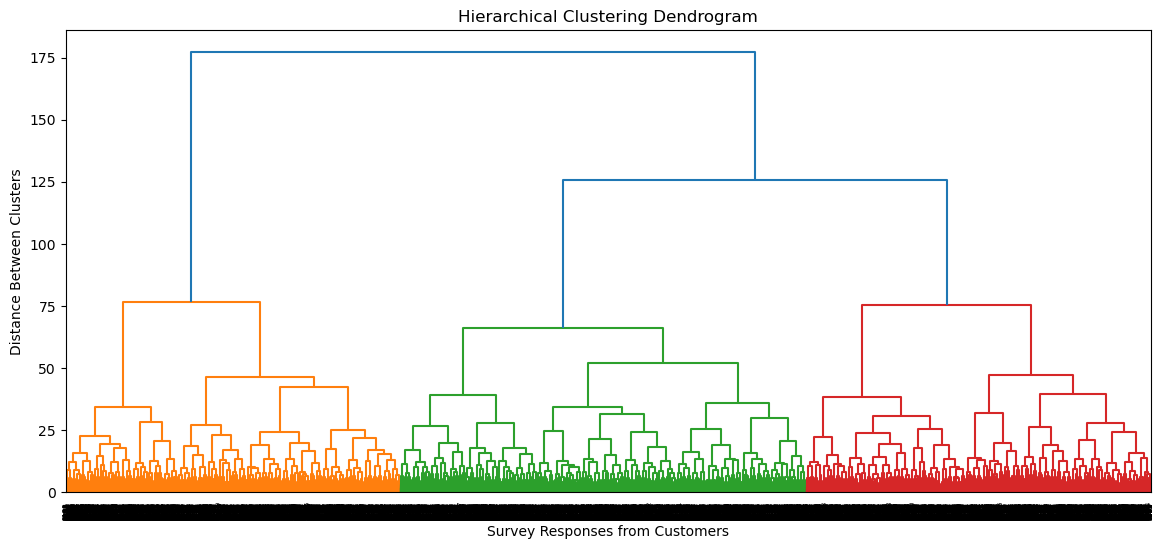

In [17]:
#dendrogram results
plt.figure(figsize=(14, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Survey Responses from Customers')
plt.ylabel('Distance Between Clusters')
dendrogram(matrix_ward)
plt.show()

In [18]:
%timeit linkage(data[['Timely_Respd', 'Timely_Fixes', 'Timely_Replc', 'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch', 'Evidence_ActListen']], method='ward', metric= 'euclidean')

25 s ± 5.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# Assign cluster labels
data['labels'] = fcluster(matrix_ward, 2, criterion='maxclust')
print(data['labels'].value_counts().sort_index())

1    3085
2    6915
Name: labels, dtype: int64


In [20]:
# chart of mean/average of questionaire responses.

respd_c1_mean = data.loc[data['labels'] == 1, 'Timely_Respd'].mean()
respd_c2_mean = data.loc[data['labels'] == 2, 'Timely_Respd'].mean()
fixes_c1_mean = data.loc[data['labels'] == 1, 'Timely_Fixes'].mean()
fixes_c2_mean = data.loc[data['labels'] == 2, 'Timely_Fixes'].mean()
replc_c1_mean = data.loc[data['labels'] == 1, 'Timely_Replc'].mean()
replc_c2_mean = data.loc[data['labels'] == 2, 'Timely_Replc'].mean()
reli_c1_mean = data.loc[data['labels'] == 1, 'Reliability'].mean()
reli_c2_mean = data.loc[data['labels'] == 2, 'Reliability'].mean()
opt_c1_mean = data.loc[data['labels'] == 1, 'Options'].mean()
opt_c2_mean = data.loc[data['labels'] == 2, 'Options'].mean()
rec_c1_mean = data.loc[data['labels'] == 1, 'Respect_Resp'].mean()
rec_c2_mean = data.loc[data['labels'] == 2, 'Respect_Resp'].mean()
cur_c1_mean = data.loc[data['labels'] == 1, 'Courteous_Exch'].mean()
cur_c2_mean = data.loc[data['labels'] == 2, 'Courteous_Exch'].mean()
evid_c1_mean = data.loc[data['labels'] == 1, 'Evidence_ActListen'].mean()
evid_c2_mean = data.loc[data['labels'] == 2, 'Evidence_ActListen'].mean()

survey_mean = {'Cluster 1' : [respd_c1_mean, fixes_c1_mean, replc_c1_mean, reli_c1_mean, 
                              opt_c1_mean, rec_c1_mean, cur_c1_mean, evid_c1_mean],
               'Cluster 2' : [respd_c2_mean, fixes_c2_mean, replc_c2_mean, reli_c2_mean, 
                              opt_c2_mean, rec_c2_mean, cur_c2_mean, evid_c2_mean]}
survey_summary = pd.DataFrame(data = survey_mean, index=['Timely Response', 'Timely Fixes', 'Timely Replacements', 
                                                         'Reliability', 'Options', 
                                                         'Respectful Responses', 'Courteous Exchange', 
                                                         'Evidence of Active Listening'])
survey_summary

,Cluster 1,Cluster 2
Timely Response,6.272285,5.168764
Timely Fixes,6.217504,5.172523
Timely Replacements,6.148460,5.229501
Reliability,5.986386,5.286623
Options,5.019449,5.724657
Respectful Responses,6.259643,5.165004
Courteous Exchange,6.207455,5.170644
Evidence of Active Listening,6.177310,5.204194


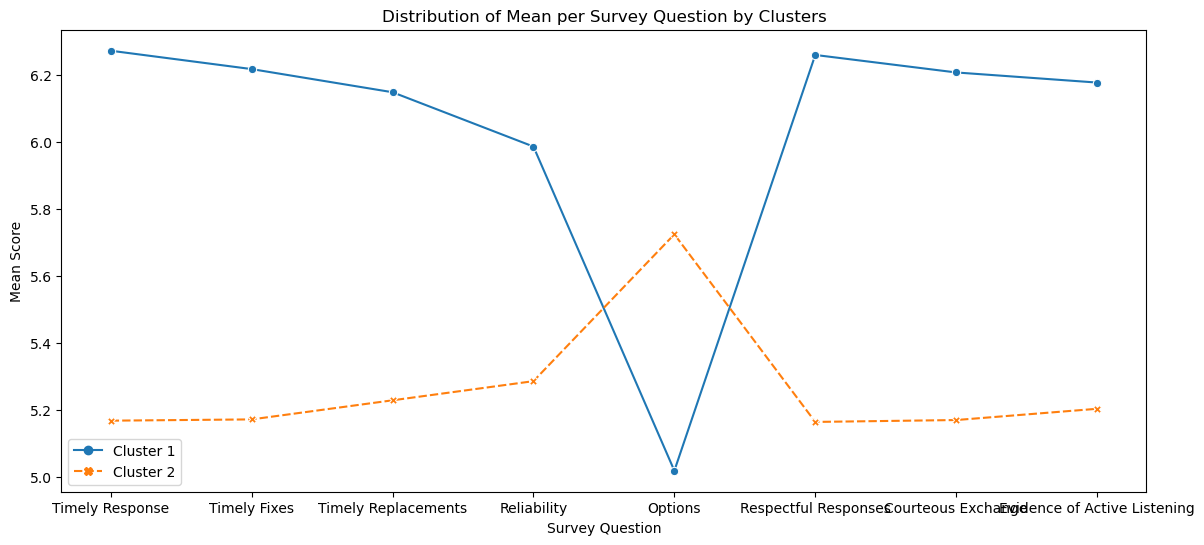

In [21]:
#lineplot of survey summary
plt.figure(figsize = [14,6])
sns.lineplot(data = survey_summary, markers=True)
plt.title("Distribution of Mean per Survey Question by Clusters")
plt.xlabel("Survey Question")
plt.ylabel("Mean Score");

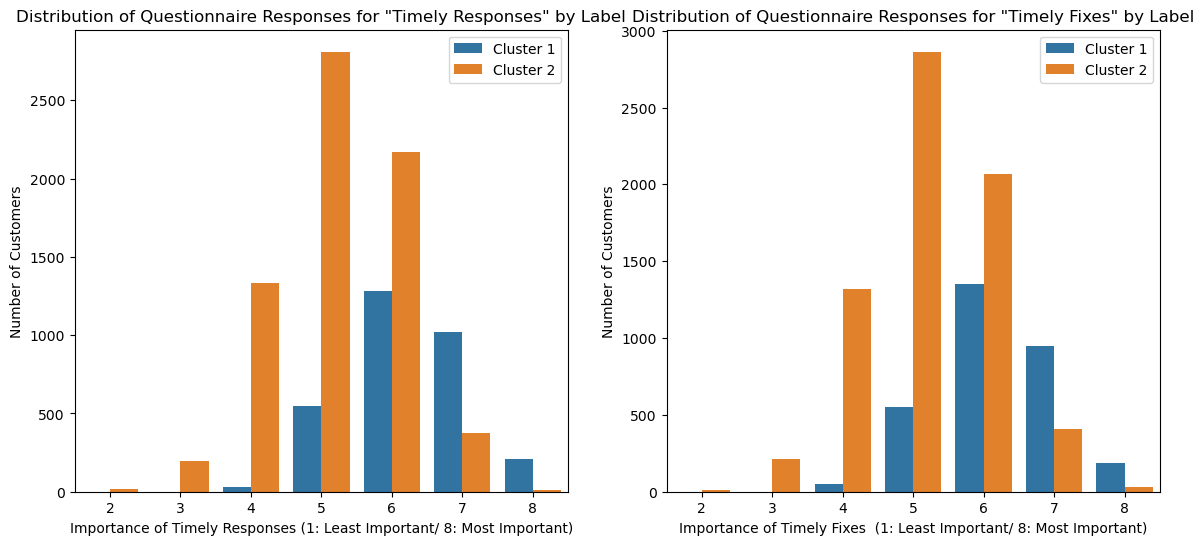

In [28]:
# Distribution of scores for survey questions timely responses and timely fixes
plt.figure(figsize = [14,6])
plt.subplot(1, 2, 1)
plt.title('Distribution of Questionnaire Responses for "Timely Responses" by Label')
sns.countplot(data = data, x="Timely_Respd", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Responses (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

plt.subplot(1, 2, 2)
plt.title('Distribution of Questionnaire Responses for "Timely Fixes" by Label')
sns.countplot(data = data, x="Timely_Fixes", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Fixes  (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

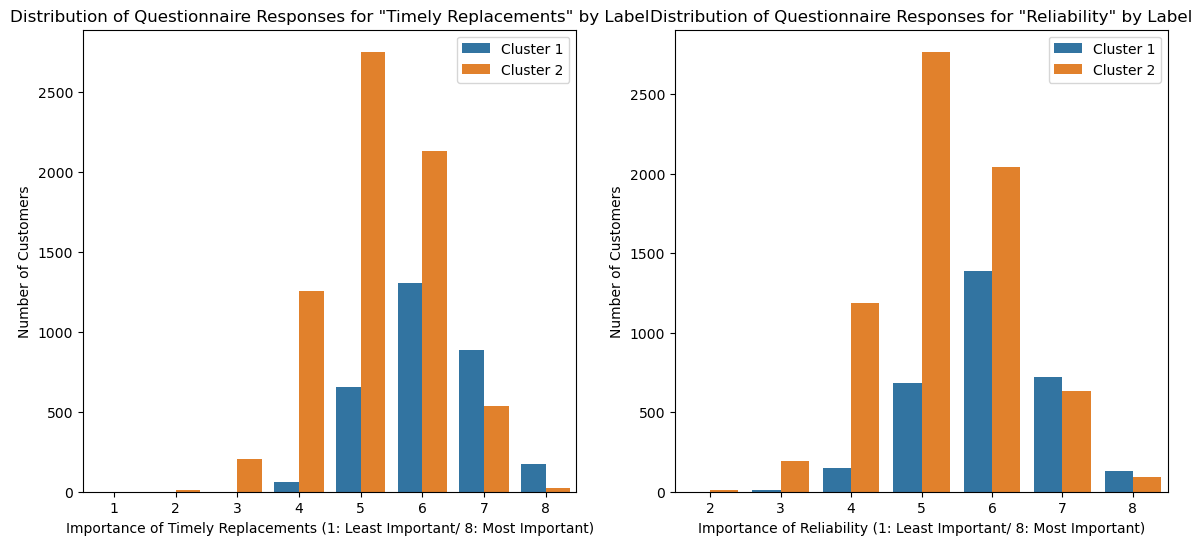

In [23]:
# Distribution of scores for survey questions timely replacements & reliability
plt.figure(figsize = [14,6])
plt.subplot(1, 2, 1)
plt.title('Distribution of Questionnaire Responses for "Timely Replacements" by Label')
sns.countplot(data = data, x="Timely_Replc", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Timely Replacements (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

plt.subplot(1, 2, 2)
plt.title('Distribution of Questionnaire Responses for "Reliability" by Label')
sns.countplot(data = data, x="Reliability", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Reliability (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

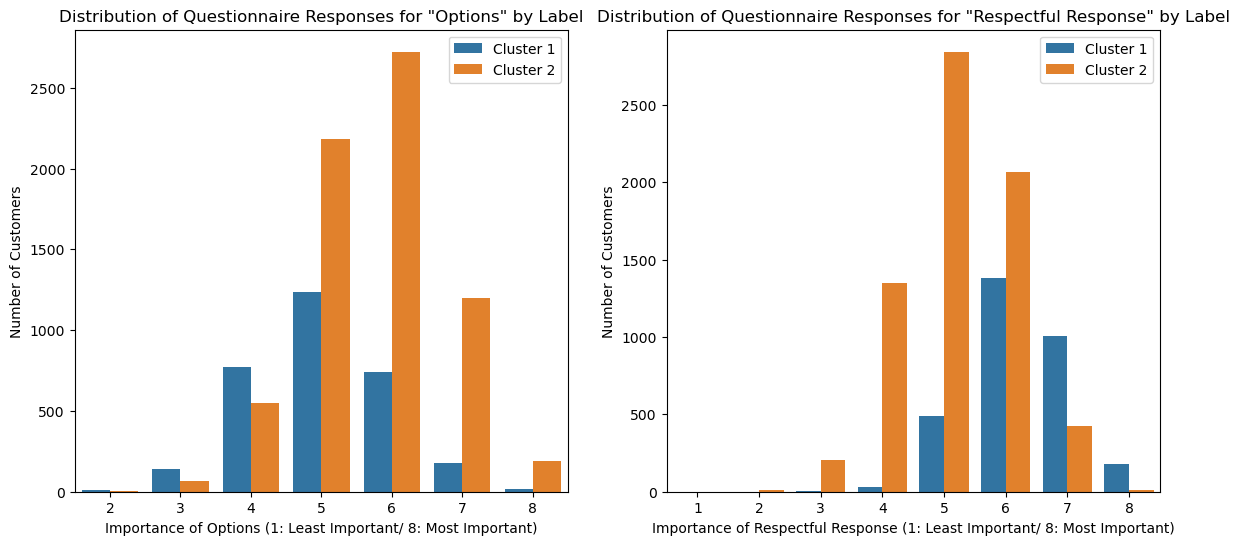

In [24]:
# Distribution of scores for survey questions options & respectful responses
plt.figure(figsize = [14,6])
plt.subplot(1, 2, 1)
plt.title('Distribution of Questionnaire Responses for "Options" by Label')
sns.countplot(data = data, x="Options", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Options (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

plt.subplot(1, 2, 2)
plt.title('Distribution of Questionnaire Responses for "Respectful Response" by Label')
sns.countplot(data = data, x="Respect_Resp", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Respectful Response (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

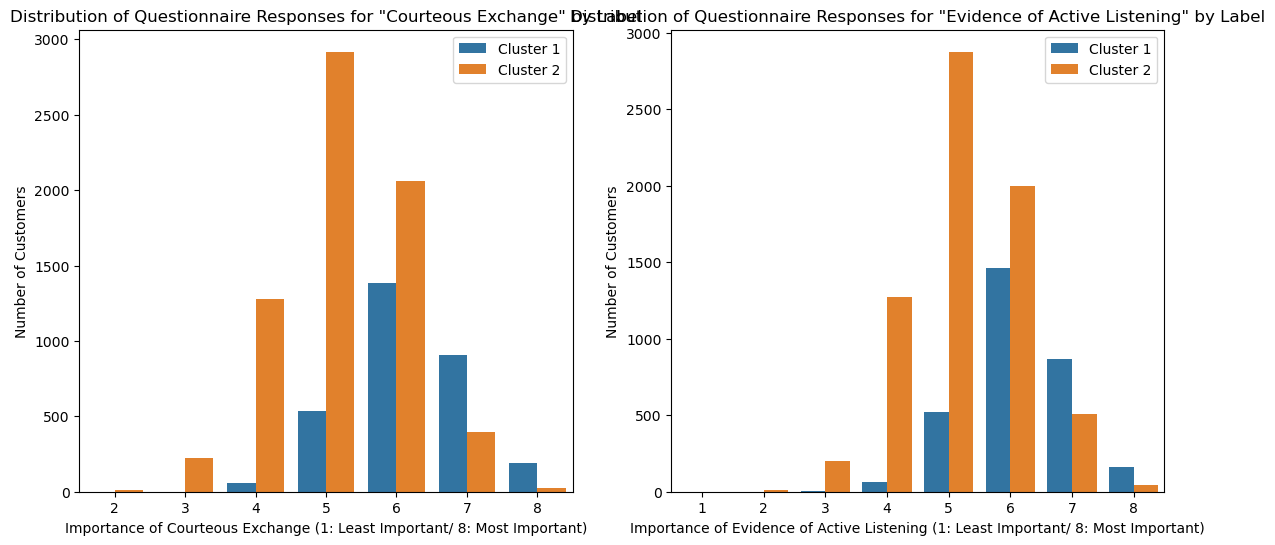

In [25]:
# Distribution of scores for survey questions courteous exchange and evidence of active listening.
plt.figure(figsize = [14,6])
plt.subplot(1, 2, 1)
plt.title('Distribution of Questionnaire Responses for "Courteous Exchange" by Label')
sns.countplot(data = data, x="Courteous_Exch", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Courteous Exchange (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

plt.subplot(1, 2, 2)
plt.title('Distribution of Questionnaire Responses for "Evidence of Active Listening" by Label')
sns.countplot(data = data, x="Evidence_ActListen", hue="labels")
plt.legend(["Cluster 1", "Cluster 2"])
plt.xlabel("Importance of Evidence of Active Listening (1: Least Important/ 8: Most Important)")
plt.ylabel("Number of Customers");

In [26]:
#accuracy of clustering method via silhouette score
# Define and X (feature columns) and y (resulting cluster labels)
X = data[['Timely_Respd', 'Timely_Fixes', 'Timely_Replc', 'Reliability', 'Options',
          'Respect_Resp', 'Courteous_Exch', 'Evidence_ActListen']]
y = data['labels']
         
# Generate a silhouette score rounded to nearest hundredth
accuracy_score = silhouette_score(X, y, metric='euclidean')
print(f"Heirarchical Clustering Silhouette Score: {round(accuracy_score, 2)}")

Heirarchical Clustering Silhouette Score: 0.17


In [27]:
data.to_csv(r'AFCodeD212Tk1_clean.csv')